In [1]:
using NearestNeighbors
using Colors
using CairoMakie

#### This notebook generates a ball tree and then shows a few pretty plots.

In [2]:
tree = BallTree(rand(2,100), Euclidean(); leafsize = 10)

BallTree{StaticArraysCore.SVector{2, Float64}, 2, Float64, Euclidean}
  Number of points: 100
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

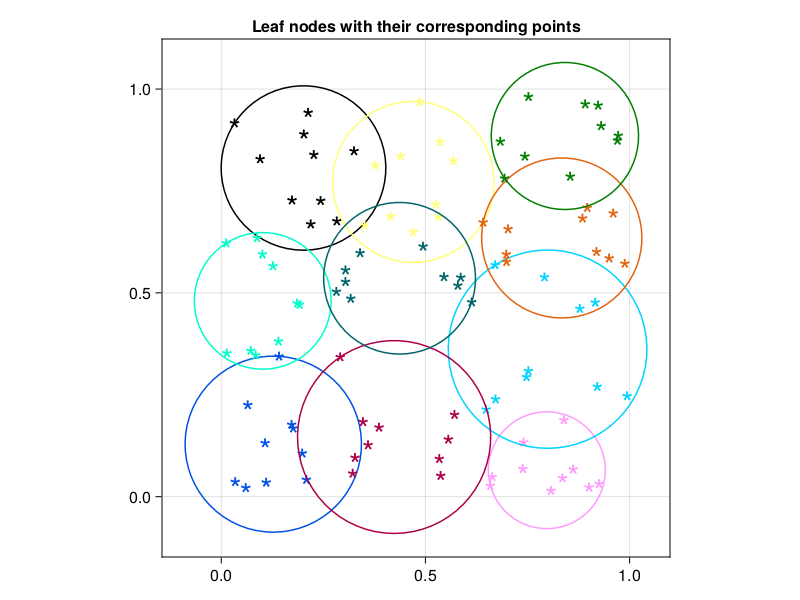

In [3]:
import NearestNeighbors.HyperSphere

# Adds a sphere to an axis
function add_sphere(ax, hs::HyperSphere, color)
    lines!(ax, Circle(Point2f(hs.center), hs.r); color) # color
end

# Skip non leaf nodes
offset = tree.tree_data.n_internal_nodes + 1
nleafs = tree.tree_data.n_leafs

# Range of leaf nodes
index_range = offset: offset + nleafs - 1

# Generate some nice colors
cols = distinguishable_colors(length(index_range), RGB(0,0,0))

# Create figure
fig = CairoMakie.Figure()
ax = Axis(fig[1, 1], aspect=DataAspect(), title="Leaf nodes with their corresponding points")

for (i, idx) = enumerate(index_range)
    col = cols[i]
    # Get the indices of the leaf nodes into the tree data
    range = NearestNeighbors.get_leaf_range(tree.tree_data, idx)
    d = tree.data[range]
    
    # Plot the points in the hyper sphere
    scatter!(ax, getindex.(d, 1), getindex.(d, 2), marker='*', markersize=32, color=col)
    
    # And the hypersphere itself
    sphere = tree.hyper_spheres[idx]
    add_sphere(ax, sphere, col)
end

fig

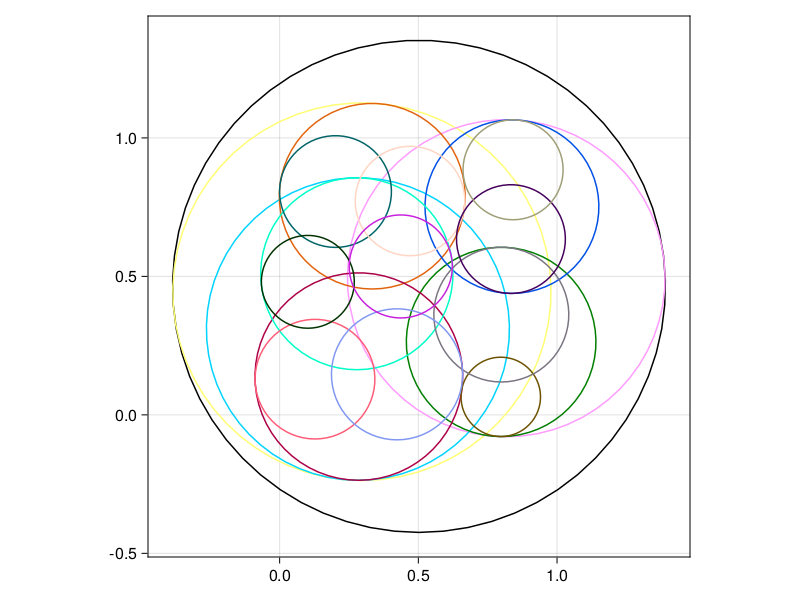

In [4]:
# Range of leaf nodes
index_range = 1: offset + nleafs - 1

# Generate some nice colors
cols = distinguishable_colors(length(index_range), RGB(0,0,0))

# Create figure
fig = CairoMakie.Figure()
ax = Axis(fig[1, 1], aspect=DataAspect())

for (i, idx) = enumerate(index_range)
    col = cols[i]
    # And the hypersphere itself
    sphere = tree.hyper_spheres[idx]
    add_sphere(ax, sphere, col)
end

fig

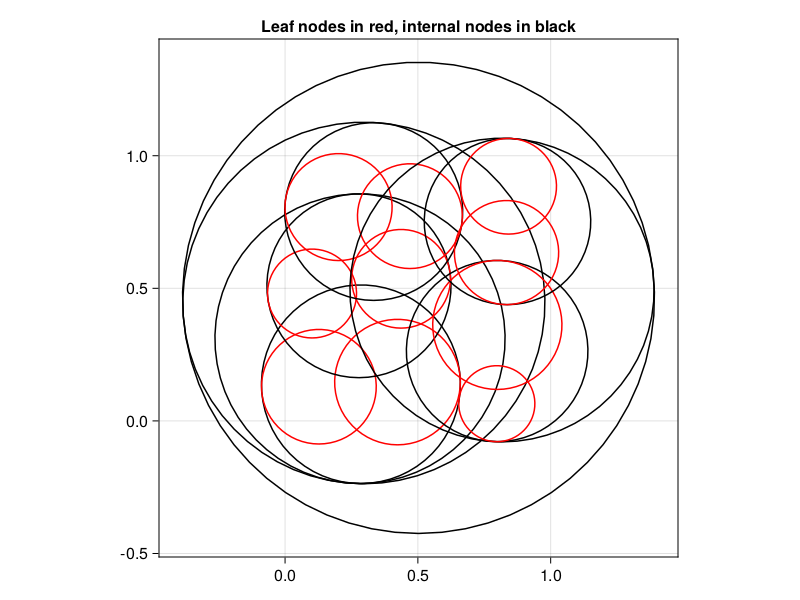

In [5]:
import NearestNeighbors: isleaf, getleft, getright

# Two different colors for internal and leaf nodes
col_leaf = RGB(1.0,0.0,0.0)
col_internal = RGB(0.0,0.0,0.0)

# Create figure
fig = CairoMakie.Figure()
ax = Axis(fig[1, 1], aspect=DataAspect(), title="Leaf nodes in red, internal nodes in black")

function plot_tree(index, lvl)
    leaf = isleaf(tree.tree_data.n_internal_nodes, index)
    col = leaf ? col_leaf : col_internal
    sphere = tree.hyper_spheres[index]
    add_sphere(ax, sphere, col)
    
    # Recursively call the tree plotter on the sub trees
    if !leaf
        plot_tree(getleft(index), lvl+1)
        plot_tree(getright(index), lvl+1)
    end
end

plot_tree(1, 1)
fig